In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
weather = pd.read_csv('daily-weather-cities.csv')
weather.tail()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
193114,10384,Berlin,2023-08-30,Summer,15.6,11.9,19.7,NaN,NaN,239.0,9.8,24.1,1010.8,NaN
193115,10384,Berlin,2023-08-31,Summer,16.2,12.0,21.1,NaN,NaN,203.0,10.4,25.9,1012.1,NaN
193116,10384,Berlin,2023-09-01,Autumn,16.7,12.2,21.7,NaN,NaN,190.0,11.0,27.8,1015.5,NaN
193117,10384,Berlin,2023-09-02,Autumn,17.6,13.3,22.5,NaN,NaN,226.0,11.7,27.8,1017.5,NaN
193118,10384,Berlin,2023-09-03,Autumn,18.5,13.5,23.9,NaN,NaN,190.0,11.5,27.8,1017.6,NaN


ici, j'affiche les dernières lignes, car les premières présentent beaucoup de données manquantes.

Taille du data set, et noms des colonnes: 

In [3]:
weather.shape, weather.columns

((193119, 14),
 Index(['station_id', 'city_name', 'date', 'season', 'avg_temp_c', 'min_temp_c',
        'max_temp_c', 'precipitation_mm', 'snow_depth_mm', 'avg_wind_dir_deg',
        'avg_wind_speed_kmh', 'peak_wind_gust_kmh', 'avg_sea_level_pres_hpa',
        'sunshine_total_min'],
       dtype='object'))

Ce data set contient 193119 lignes et 14 colonnes.

Comme pour les deux autres fichiers, affichons de façon générale les statistiques de chaque colonne:

In [4]:
for colonne in weather.columns:
    print(colonne,':\n',weather[colonne].describe(), '\n')

station_id :
 count    193119.000000
mean       8674.711235
std        2098.969159
min        6447.000000
25%        6447.000000
50%        7149.000000
75%       11035.000000
max       11035.000000
Name: station_id, dtype: float64 

city_name :
 count       193119
unique           4
top       Brussels
freq         69347
Name: city_name, dtype: object 

date :
 count         193119
unique         69642
top       1950-09-12
freq               4
Name: date, dtype: object 

season :
 count     193119
unique         4
top       Spring
freq       48826
Name: season, dtype: object 

avg_temp_c :
 count    94672.000000
mean        10.622556
std          7.485526
min        -18.500000
25%          5.100000
50%         10.800000
75%         16.500000
max         33.400000
Name: avg_temp_c, dtype: float64 

min_temp_c :
 count    191314.000000
mean          6.348172
std           6.691068
min         -26.000000
25%           1.500000
50%           6.700000
75%          11.700000
max          25.3

On a des données pour seulement 4 villes différents; séparons le tableau en 4 tableaux pour chaque ville pour traiter dans un premier temps les données par villes avant de les comparer.

In [5]:
weather_vie=weather[weather['city_name']=='Vienna'].copy()

In [6]:
weather_bru=weather[weather['city_name']=='Brussels']


In [7]:
weather_par=weather[weather['city_name']=='Paris']


In [8]:
weather_ber=weather[weather['city_name']=='Berlin']


Affichons l'évolution de la température au cours du temps pour chaque ville. On doit pour cela commencer par convertir la colonne date pour que le format soit le bon pour ensuite explorer les données.

In [9]:
weather_vie['date'] = pd.to_datetime(weather_vie['date'], errors='coerce')
weather_vie['date'] #vérification de l'affichage après conversion.

0       1855-02-01
1       1855-02-02
2       1855-02-03
3       1855-02-04
4       1855-02-05
           ...    
61472   2023-08-31
61473   2023-09-01
61474   2023-09-02
61475   2023-09-03
61476   2023-09-04
Name: date, Length: 61477, dtype: datetime64[ns]

Traçons l'évolution de la tempréature moyenne à Vienne au cours des années:

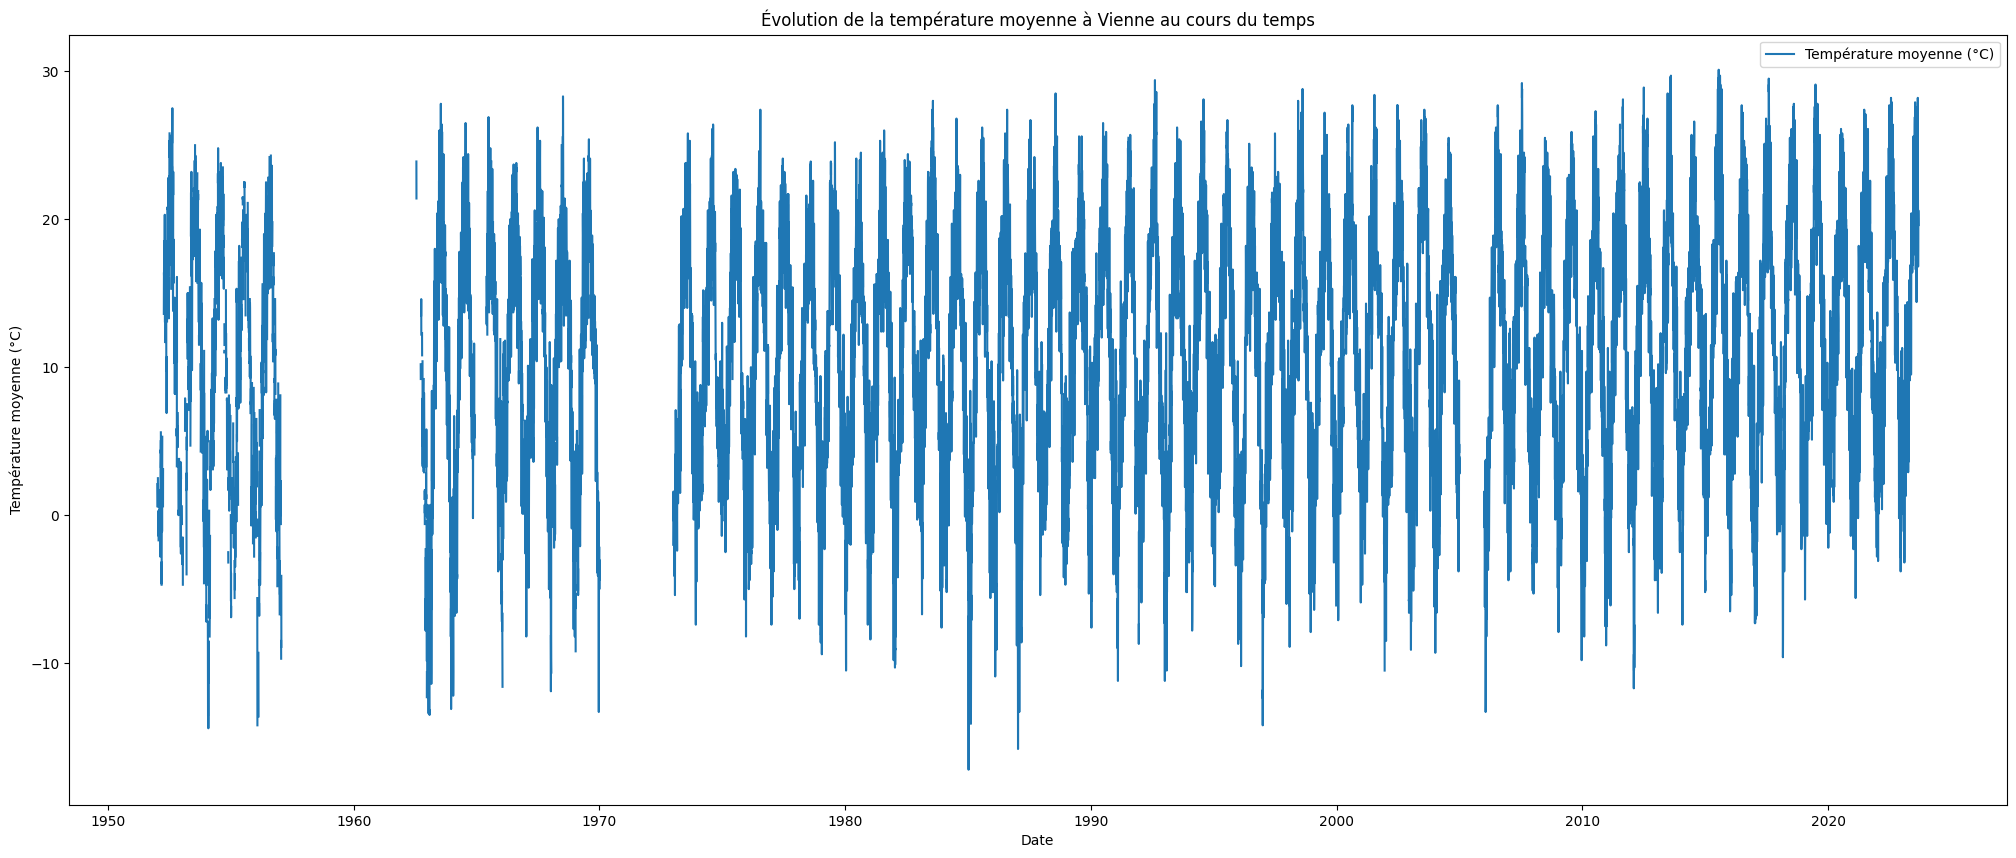

In [10]:
plt.figure(figsize=(25, 10))
plt.plot(weather_vie['date'], weather_vie['avg_temp_c'], label='Température moyenne (°C)')
plt.title("Évolution de la température moyenne à Vienne au cours du temps")
plt.xlabel("Date")
plt.ylabel("Température moyenne (°C)")
plt.legend()
plt.show()

Les oscillations correspondent aux années, le même schéma se répète chaque année, et les variations sont dues aux saisons.

Pour pouvoir comparer l'évolution au cours du temps, il serait alors plus judicieux de tracer l'évolution de la température ai cours de l'années pour quelques années sélectionnées; faisons le ici pour 1952 (première année dont les valeurs sont disponibles), 1973, 2003 et 2022 (dernière année dont les données sont disponibles pour tous les mois).\
On extrait alors à chaque fois du data set un tableau renseignant seulement les valeurs pour l'année voulue.

In [11]:
weather_vie_1952  = weather_vie[weather_vie['date'].dt.year == 1952].copy()

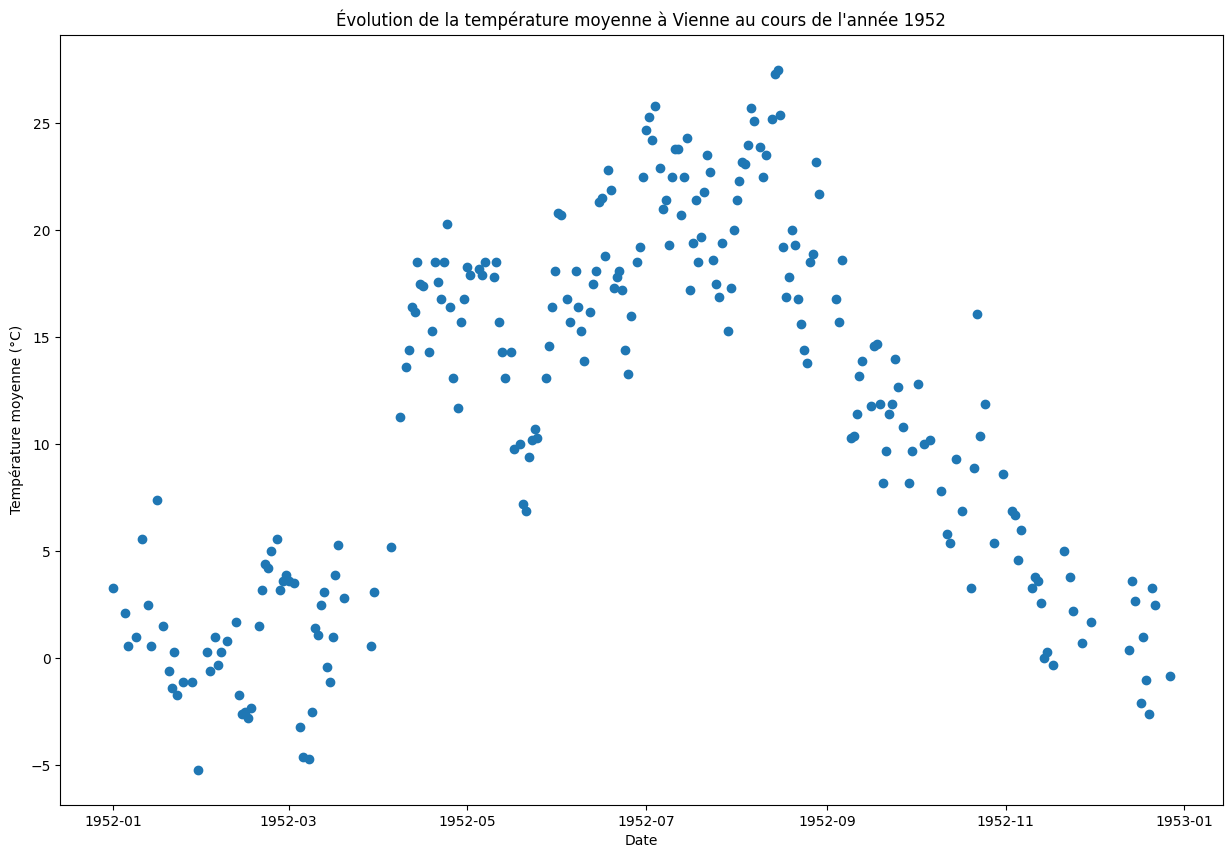

In [12]:
plt.figure(figsize=(15, 10))
plt.scatter(weather_vie_1952['date'], weather_vie_1952['avg_temp_c'])
plt.title("Évolution de la température moyenne à Vienne au cours de l'année 1952")
plt.xlabel("Date")
plt.ylabel("Température moyenne (°C)")

plt.show()

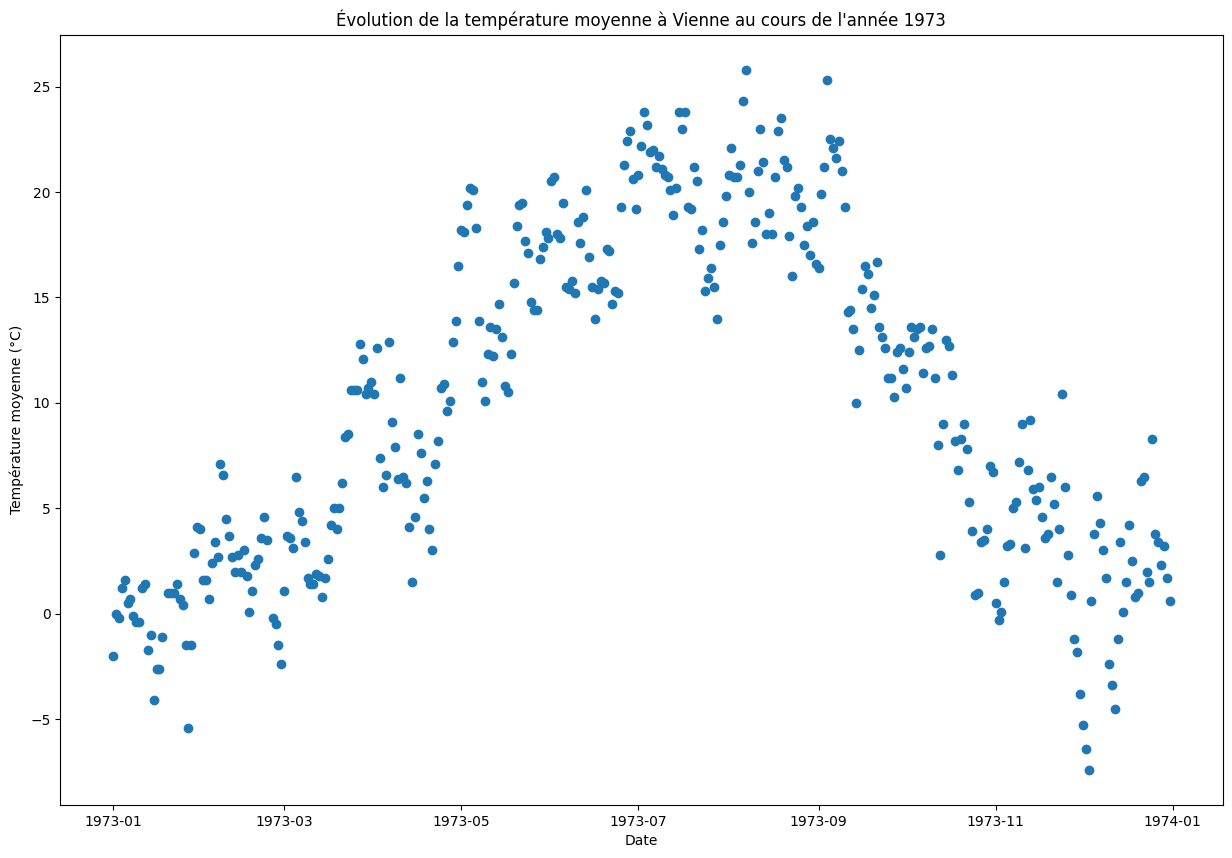

In [13]:
weather_vie_1973 = weather_vie[weather_vie['date'].dt.year == 1973].copy()
plt.figure(figsize=(15, 10))
plt.scatter(weather_vie_1973['date'], weather_vie_1973['avg_temp_c'])
plt.title("Évolution de la température moyenne à Vienne au cours de l'année 1973")
plt.xlabel("Date")
plt.ylabel("Température moyenne (°C)")

plt.show()

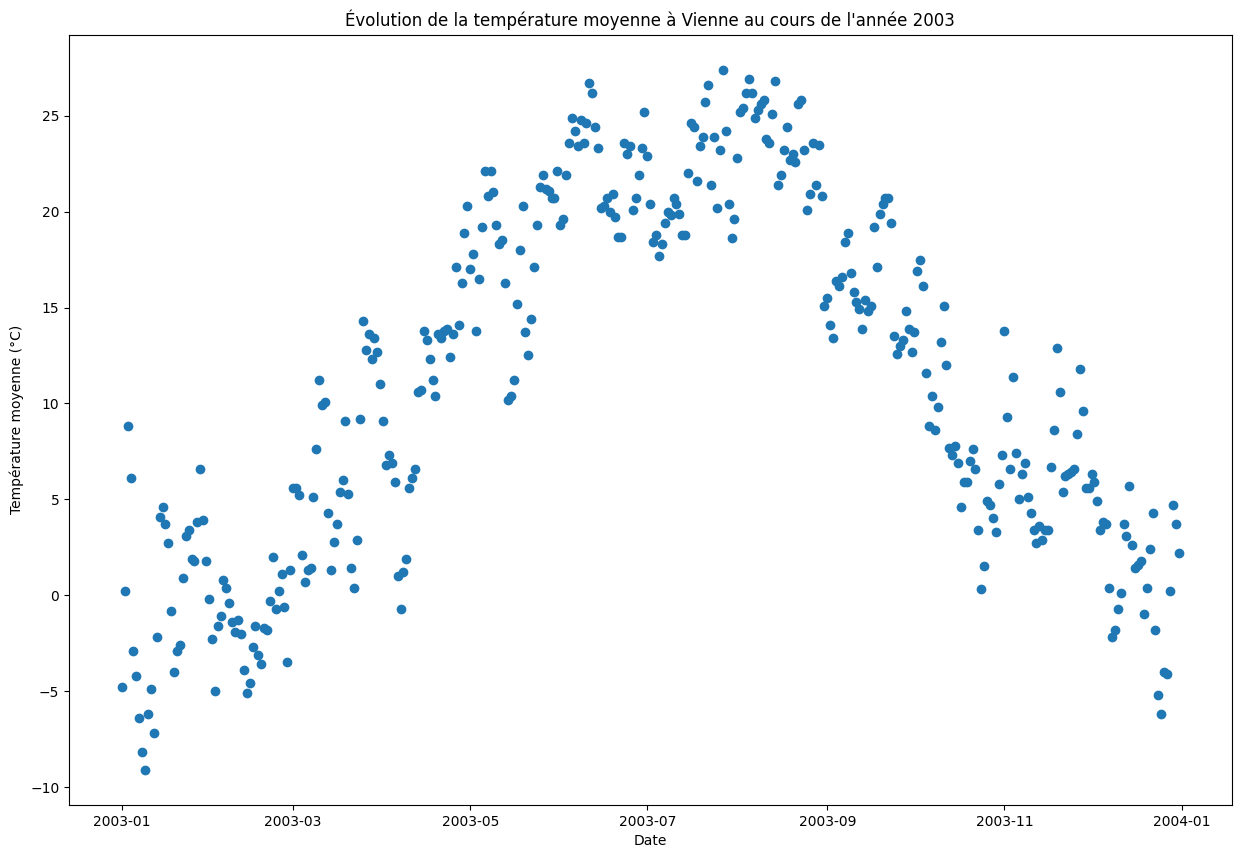

In [14]:
weather_vie_2003 = weather_vie[weather_vie['date'].dt.year == 2003].copy()
plt.figure(figsize=(15, 10))
plt.scatter(weather_vie_2003['date'], weather_vie_2003['avg_temp_c'])
plt.title("Évolution de la température moyenne à Vienne au cours de l'année 2003")
plt.xlabel("Date")
plt.ylabel("Température moyenne (°C)")

plt.show()

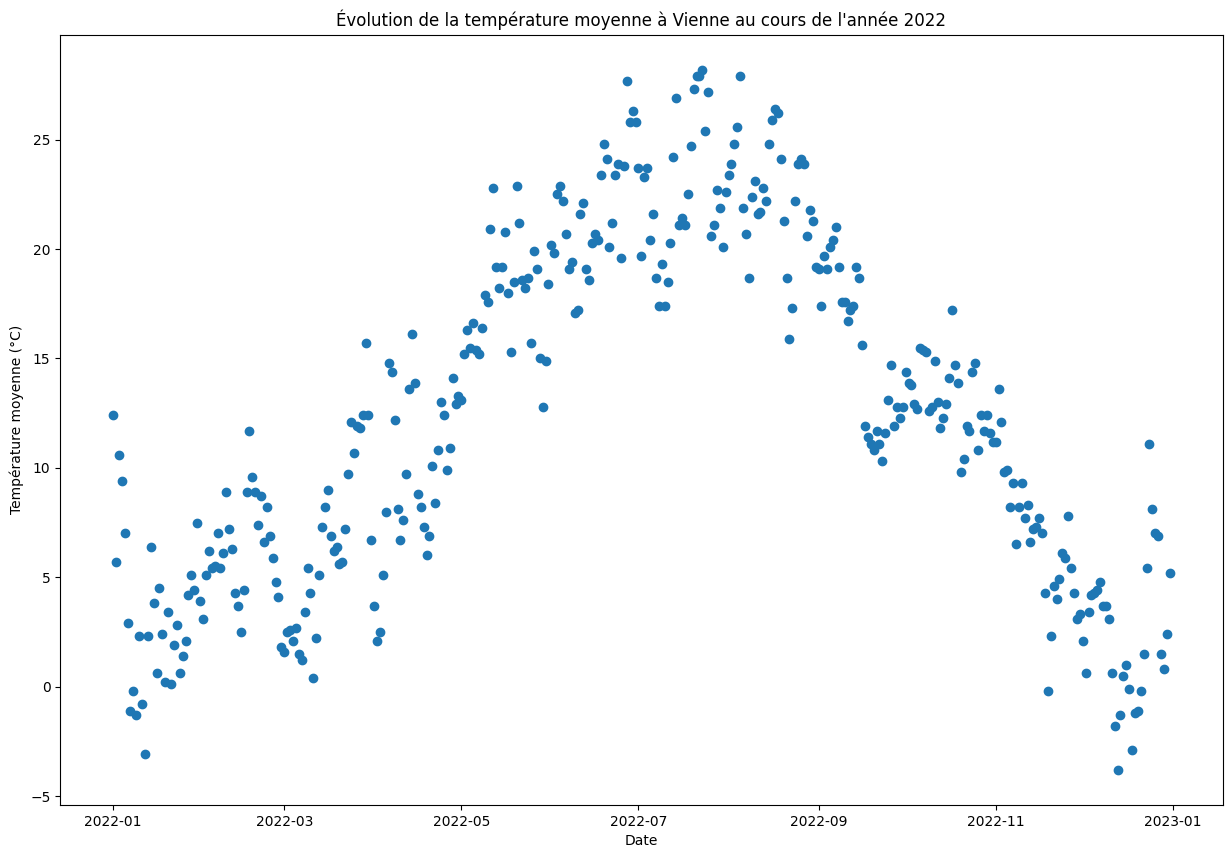

In [15]:
weather_vie_2022 = weather_vie[weather_vie['date'].dt.year == 2022].copy()
plt.figure(figsize=(15, 10))
plt.scatter(weather_vie_2022['date'], weather_vie_2022['avg_temp_c'])
plt.title("Évolution de la température moyenne à Vienne au cours de l'année 2022")
plt.xlabel("Date")
plt.ylabel("Température moyenne (°C)")

plt.show()

Les schéma est typiquement le même pour ces 4 années, avec un pic en été. Il est difficile de comparer les valeurs de cette façon-là, donc regardons l'écart entre l'année 1952 (première année avec des données) et l'année 2022 (dernière année avec données sur l'année entière) de la température moyenne :

Ainsi, il nous faut calculer la température moyenne pour chaque mois de ces deux années. On commence par grouper les données par mois (ceci est possible car on a bien converti les données de date), et on applique la méthode de la moyenne. On calcule alors la différence pour chaque mois entre ces deux années.

In [16]:
moyenne_mensuelle_1952 = weather_vie_1952.groupby(weather_vie_1952['date'].dt.month)['avg_temp_c'].mean()
moyenne_mensuelle_2022 = weather_vie_2022.groupby(weather_vie_2022['date'].dt.month)['avg_temp_c'].mean()
diff=moyenne_mensuelle_2022 - moyenne_mensuelle_1952

On utilise les index et les values pour bien graduer nos axes : avec index on récupère le mois, et avec values la valeur de la température moyenne pour le mois en question. Ensuite dans les paramètres d'affichage, on utlise la méthode xticks de matplotlib pour afficher les noms des mois et pas simplement les numéros.\
On trace également, sur un autre schéma (les échelles de valeurs étant différentes, cela n'aurait pas été très visible sur le même graphe), la différence entre ces valeurs.

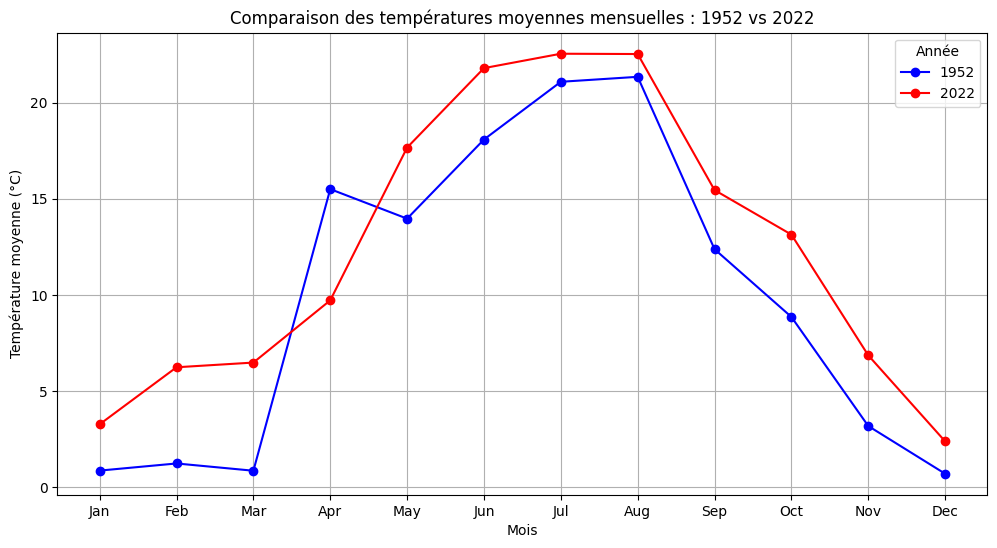

Text(0, 0.5, 'Différence de température moyenne (°C)')

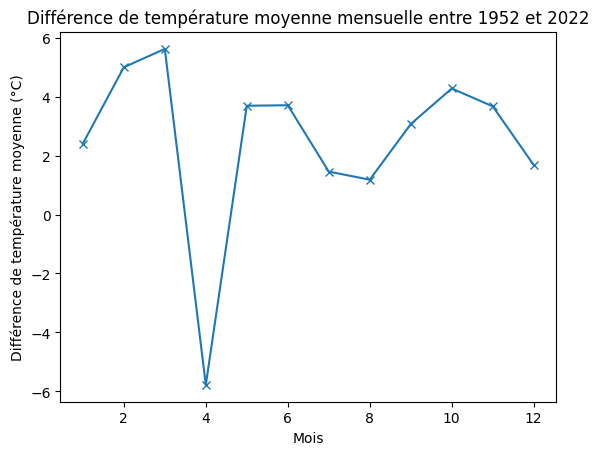

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(moyenne_mensuelle_1952.index, moyenne_mensuelle_1952.values, label='1952', color='blue', marker='o')
plt.plot(moyenne_mensuelle_2022.index, moyenne_mensuelle_2022.values, label='2022', color='red', marker='o')
plt.title("Comparaison des températures moyennes mensuelles : 1952 vs 2022")
plt.xlabel("Mois")
plt.ylabel("Température moyenne (°C)")
plt.legend(title="Année")
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

plt.plot(diff, marker='x')
plt.title("Différence de température moyenne mensuelle entre 1952 et 2022")
plt.xlabel("Mois")
plt.ylabel("Différence de température moyenne (°C)")

Excepté le mois d'Avril 1952 qui se montre avoir été particulièrement chaud, on note que la température a augmenté d'en moyenne environ 3 degrés en 70 ans à Vienne.

Penchons nous maintenant sur l'évolution des températures annuelles pour chaque ville; et faisons apparaître les températures moyennes, minimales et maximales pour voir si des éacrts s'intensifiient ou si le réchuaffement est global.

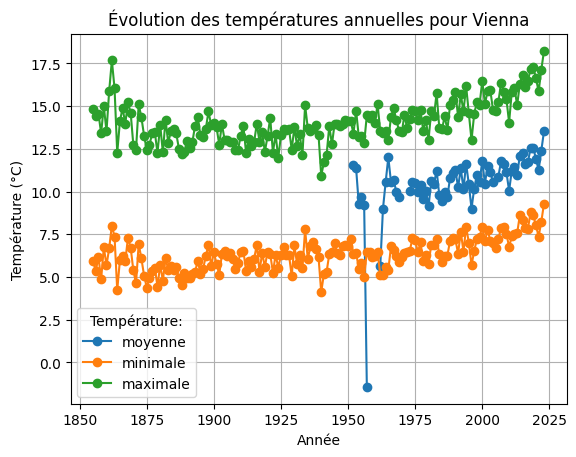

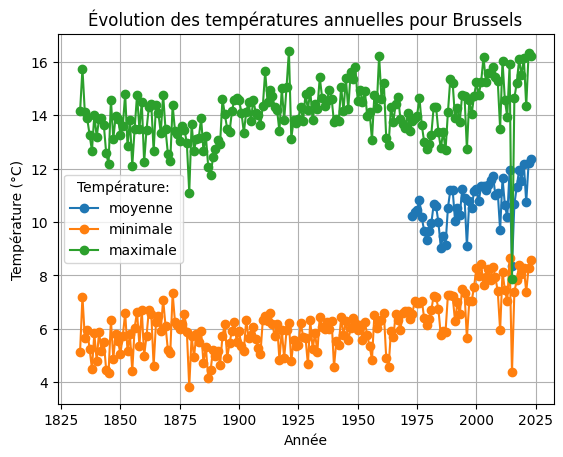

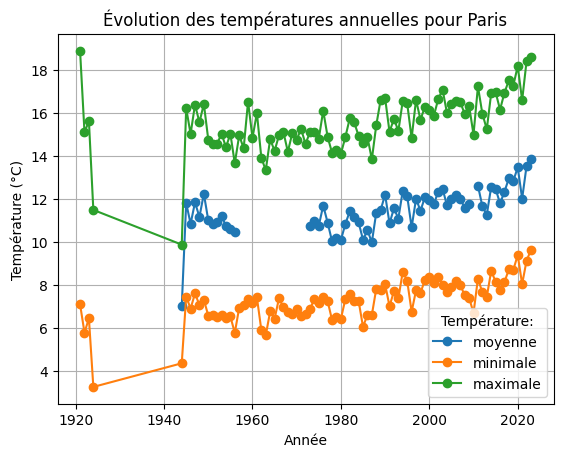

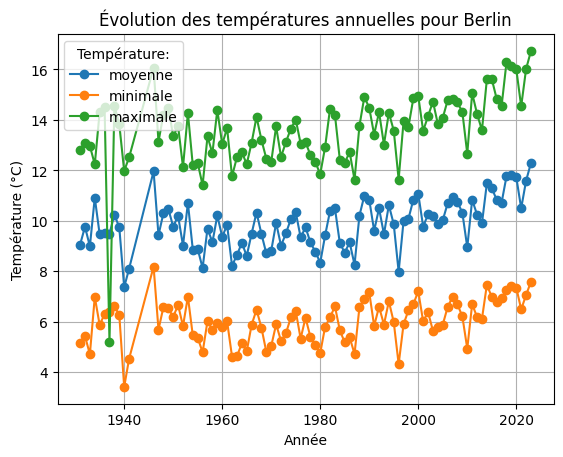

In [18]:

# On convertit la colonne date en date time pour que le format soit exploitable
weather['date'] = pd.to_datetime(weather['date'], errors='coerce')

# Si on ne l'a pas encore fait, on crée une colonne année qui resence l'année extraite de la colonne date
if 'year' not in weather.columns:
    weather['year'] = weather['date'].dt.year

# On calcule les moyennes annuelles des températures moyennes, minimales et maximales, en groupant par raport à la ville et l'année
temp_moyenne_annuelle = weather.groupby(['city_name', 'year'])['avg_temp_c'].mean().reset_index()
temp_min_annuelle = weather.groupby(['city_name', 'year'])['min_temp_c'].mean().reset_index()
temp_max_annuelle = weather.groupby(['city_name', 'year'])['max_temp_c'].mean().reset_index()


# Pouur chaque ville, on trace ces moyennes au cours du temps sur un même graphique
villes = weather['city_name'].unique()

for ville in villes:
    # Filtrer les données pour la ville
    donnees_ville = temp_moyenne_annuelle[temp_moyenne_annuelle['city_name'] == ville]
    donnees_ville_min = temp_min_annuelle[temp_min_annuelle['city_name'] == ville]
    donnees_ville_max = temp_max_annuelle[temp_max_annuelle['city_name'] == ville]
    
    # Vérifier si la ville a des données
    if not donnees_ville.empty:
        # Tracer les températures
        plt.plot(donnees_ville['year'], donnees_ville['avg_temp_c'], marker='o', label='moyenne')
        plt.xlabel('Année')
        plt.ylabel('Température moyenne (°C)')
        plt.legend(title='Température:')
        plt.grid(True)
        
        plt.plot(donnees_ville_min['year'], donnees_ville_min['min_temp_c'], marker='o', label='minimale')
        plt.xlabel('Année')
        plt.ylabel('Température (°C)')
        plt.legend(title='Température:')
        plt.grid(True)
        
        plt.plot(donnees_ville_max['year'], donnees_ville_max['max_temp_c'], marker='o', label='maximale')
        plt.title(f'Évolution des températures annuelles pour {ville}')
        plt.xlabel('Année')
        plt.ylabel('Température (°C)')
        plt.legend(title='Température:')
        plt.grid(True)
        
        plt.show()

Pour chaque ville, la tendance est à la hausse, pour les 3 catégories donc le réchauffement est global, les températures minimales sont elles aussi de plus en plus élevées.\
Les températures étaient assez stables pour Vienne jusqu'en 1950 aux alentours de 10°c pour la température moyenne, puis elles ont augmenté (plus vite que linéairement) jusqu'à presque 14°c pour la température moyenne en 2024.\
On a à peu près la même chose pour Bruxelles, où l'augmentation démarre en 1950 et est vraiment marquée à partir de 1975 et est cette fois linéaire : passage de 10°c à 12,25°c en 50 ans.\
On note dès lors que l'augmentation ets plus rapide à Vienne.
À Paris l'augmentation est assez linéaire depuis les années 1980, alors que c'était stable avant cela. Il y a une augmentation de 3°c en 40 ans.\
La ville de Berlin voit également sa température augmenter de façon marquée depuis les années 80/90, avec une hausse de 3°c en moyenne environ.


On peut se concentrer sur une seule saison, prenons l'hiver, pour comparer l'évolution des températures entre les villes. On tracera également les régressions linéaires associées pour une meilleure analyse.

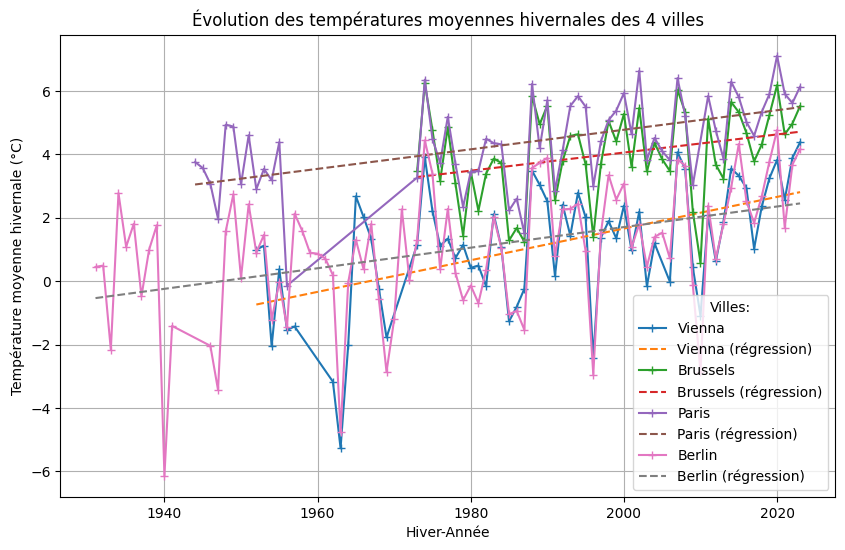

In [19]:
weather_hiver=weather[weather['season']=='Winter']
# on extrait dans un nouveau tableau les données se rapportant à l'hiver.

temp_moy_annuelle_hiver = weather_hiver.groupby(['city_name', 'year'])['avg_temp_c'].mean().reset_index()
# on calcule la température moyenne des villes sur l'hiver de chaque année en groupant le tableau hiver sur les colonnes ville
#et année, puis on applique la méthode .mean()
villes = weather_hiver['city_name'].unique()

# on trace alors cela pour chaque ville

plt.figure(figsize=(10, 6))
for ville in villes:

    donnees_ville_hiv = temp_moy_annuelle_hiver[temp_moy_annuelle_hiver['city_name'] == ville]
    #on sépare les données par ville
    
    if not donnees_ville_hiv.empty:
        # on s'assure d'avoir bien récupéré les donnes
        donnees_valides = donnees_ville_hiv.dropna(subset=['avg_temp_c'])
        # on enlève les valeurs manquantes (NaN), sinon il est impossible de faire la regression avec des trous dans les données 
        x = donnees_valides['year']
        y = donnees_valides['avg_temp_c']

        #tracer de l'évolution:
        plt.plot(x, y, marker='+', label = ville)

        #on calcule les coefficients nécessaires pour la régression
        coeffs = np.polyfit(x, y, 1)  # on applique le degré 1, car on souhaite une régression linéaire
        y_fit = coeffs[0] * x + coeffs[1] # on calcule la droite de régression
        
        # tracer la droite de régression, en pointillés:
        plt.plot(x, y_fit, linestyle='--', label=f'{ville} (régression)')
        
        
plt.title(f'Évolution des températures moyennes hivernales des 4 villes')
plt.xlabel('Hiver-Année')
plt.ylabel('Température moyenne hivernale (°C)')
plt.legend(title='Villes:')
plt.grid(True)
        
plt.show()

Comme auparavant, les températures ont augmenté au cours du temps.\
Vienne est la ville où la température a augmenté le plus vite, le coefficient directeur de sa régression linéaire étant le plus grand. Vienne dépasse alors Berlin.
La ville ayant la température la plus élevée est toutefois Paris, et ce depuis que l'on a des données.

Température moyenne par saison par ville: 

In [20]:
temp_saison = weather.groupby(['city_name', 'season'])['avg_temp_c'].mean().reset_index()

In [21]:
temp_max_saison = weather.groupby(['city_name', 'season'])['max_temp_c'].mean().reset_index()

In [22]:
temp_min_saison = weather.groupby(['city_name', 'season'])['min_temp_c'].mean().reset_index()

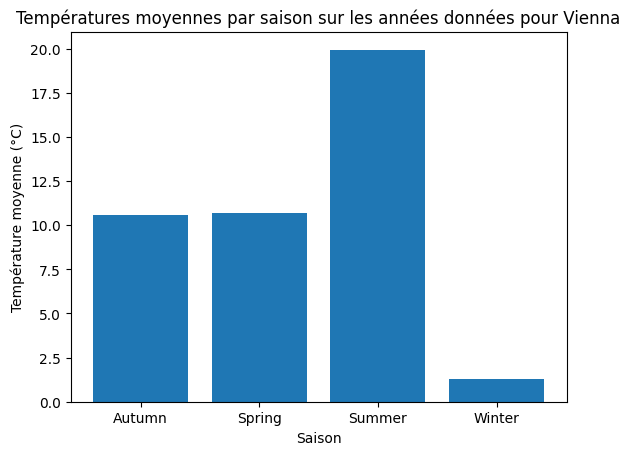

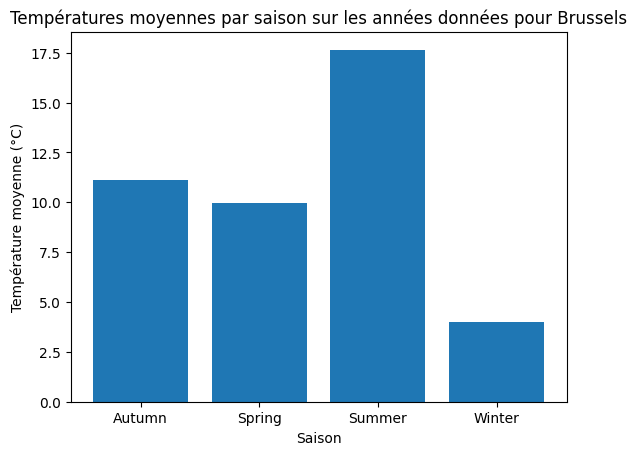

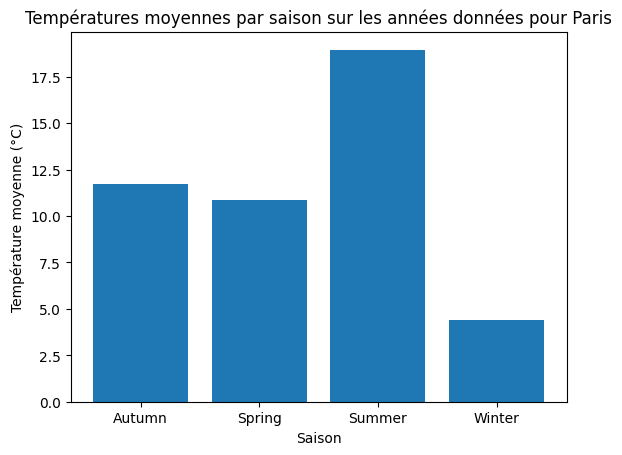

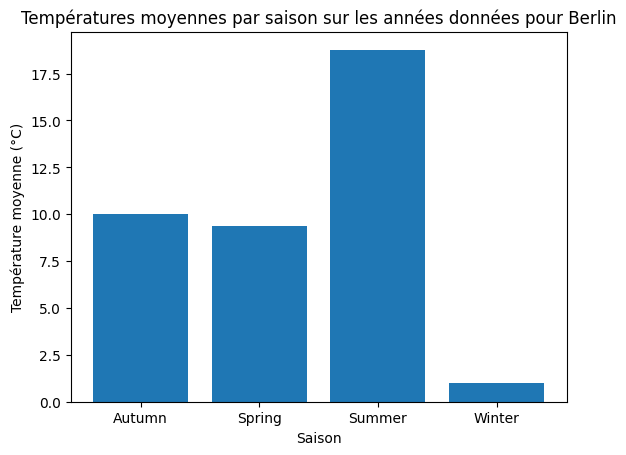

In [23]:
for ville in villes :
    donnees_ville = temp_saison[temp_saison['city_name'] == ville]
    plt.bar(donnees_ville['season'], donnees_ville['avg_temp_c'])
    plt.title(f'Températures moyennes par saison sur les années données pour {ville}')
    plt.xlabel('Saison')
    plt.ylabel('Température moyenne (°C)')
    plt.show()

Température moyenne maximale par saison par ville: 

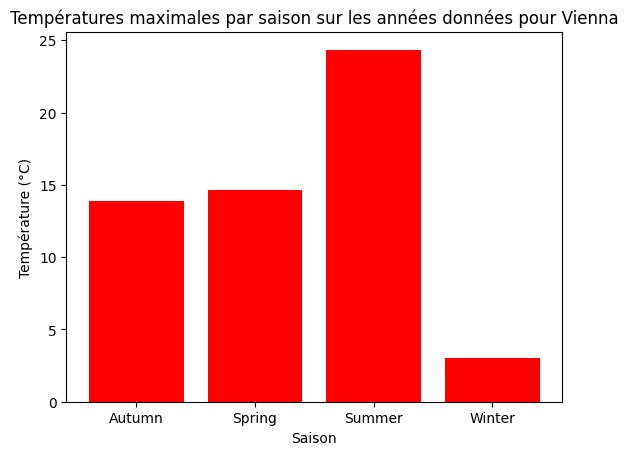

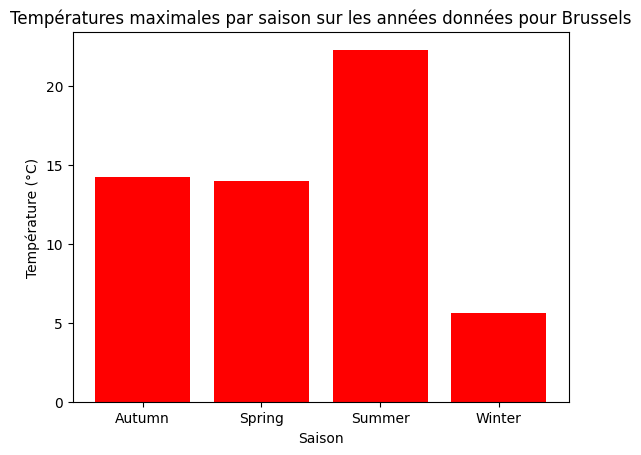

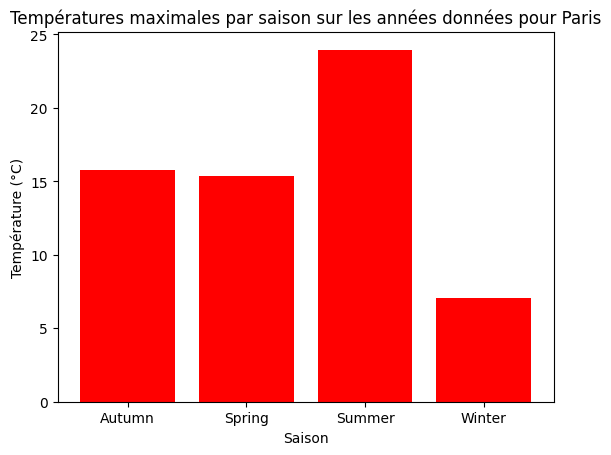

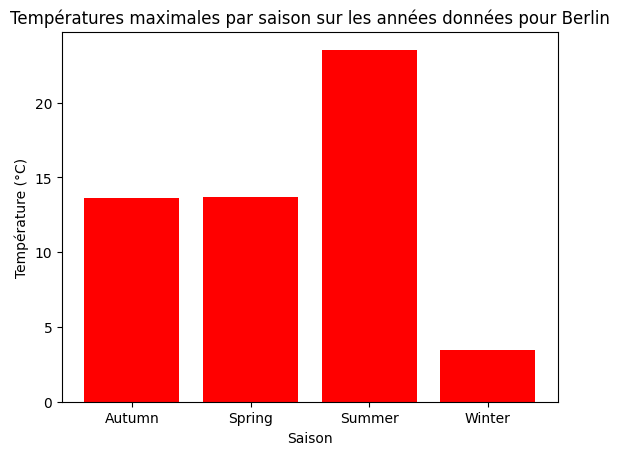

In [24]:
for ville in villes :
    donnees_ville = temp_max_saison[temp_max_saison['city_name'] == ville]
    plt.bar(donnees_ville['season'], donnees_ville['max_temp_c'], color='red')
    plt.title(f'Températures maximales par saison sur les années données pour {ville}')
    plt.xlabel('Saison')
    plt.ylabel('Température (°C)')
    plt.show()

Température moyenne minimale par saison par ville: 

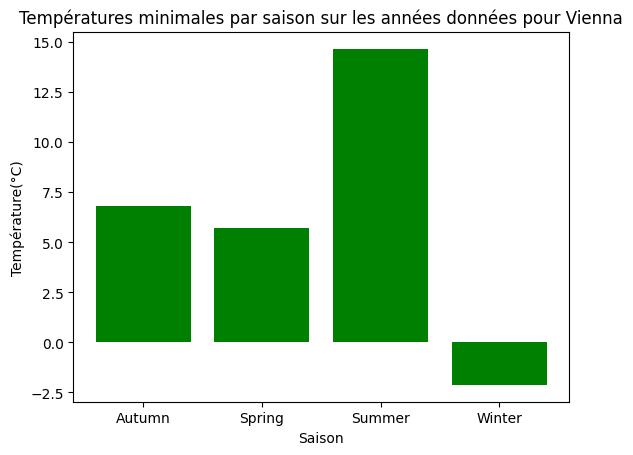

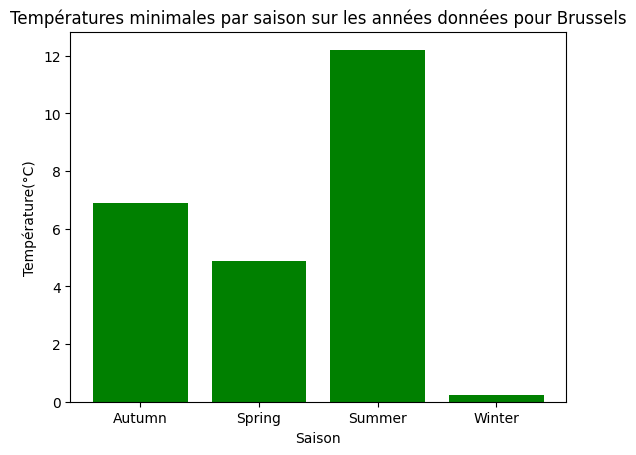

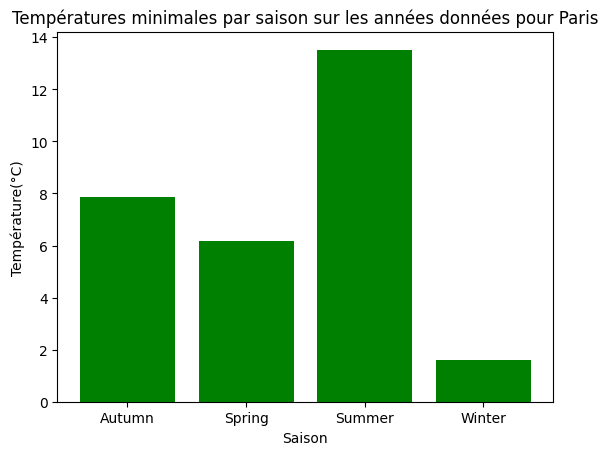

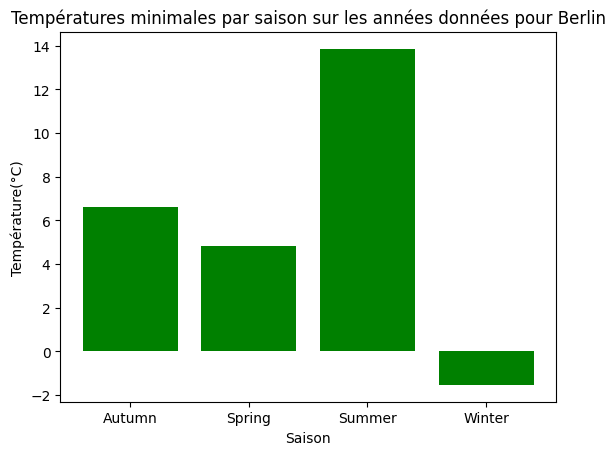

In [25]:
for ville in villes :
    donnees_ville = temp_min_saison[temp_min_saison['city_name'] == ville]
    plt.bar(donnees_ville['season'], donnees_ville['min_temp_c'], color = 'green')
    plt.title(f'Températures minimales par saison sur les années données pour {ville}')
    plt.xlabel('Saison')
    plt.ylabel('Température(°C)')
    plt.show()

En fait, ces graphiques ne sont pas pertinents : il n'y a aucun intérêt à évaluer la température moyenne sur plusieurs années sur une seule saison; on sait déjà que l'hiver est la saison la plus froide et l'été la plus chaud, il n'y a rien à intepréter.\
Si on veut utiliser ces données là, il est plus intéressant de les comparer entres villes; faisons ça : 

On met alors les 4 villes sur un même schéma pour comparer les villes et les saisons.

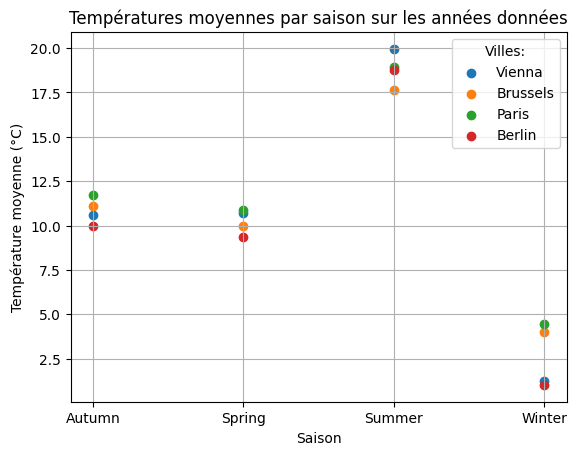

In [26]:
for ville in villes :
    donnees_ville = temp_saison[temp_saison['city_name'] == ville]
    plt.scatter(donnees_ville['season'], donnees_ville['avg_temp_c'], label=ville)
    plt.grid(True)

plt.title('Températures moyennes par saison sur les années données')
plt.xlabel('Saison')
plt.ylabel('Température moyenne (°C)')
plt.legend(title='Villes:')
plt.show()

Résultats :
- En automne, dans l'odre du plus chaud au plus froid : Paris, Bruxelles, Vienne, Berlin
- Au printemps, dans l'odre du plus chaud au plus froid : Paris, Vienne, Burxelles, Berlin
- En été, dans l'odre du plus chaud au plus froid : Vienne, Paris, Berlin, Bruxelles
- En hiver, dans l'odre du plus chaud au plus froid : Paris, Bruxelles, Vienne, Berlin

La ville où il y a le moins de variations entre les saisons est Bruxelles, puis après c'est Paris.

On note qu'il y a peu de dispersion entre les villes au printemps et en automne, tandis qu'en hiver et en été les écarts sont significatifs; on comprend alors qu'on peut analyser automne et printemps de façon similaire.

Problème: il aurait fallu sélectioner les années communes avec 100% des valeurs disponibles pour comparer de manière cohérente, c'es-à-dire sur des moyennes portant sur exactement les mêmes années, mais je ne savais pas comment trier de cette façon-là les données.

Étude des corrélations précipitations-températures, ensoleillement-vent et précipitations-pression atmosphérique:

In [29]:
# On crée une fonction qui calcule les corrélations entre deux variables; celle-ci retourne un dictionnaire 
# avec les valeurs des corrélations entre les paires de variables:

def calcule_correlations(df):
    correlations = {}
    
    # corrélation entre température et précipitations
    temp_precip_corr = df[['avg_temp_c', 'precipitation_mm']].corr().iloc[0, 1]
    correlations['temp_precip_corr'] = temp_precip_corr
    
    # corrélation entre ensoleillement et vent
    sunshine_wind_corr = df[['sunshine_total_min', 'avg_wind_speed_kmh']].corr().iloc[0, 1]
    correlations['sunshine_wind_corr'] = sunshine_wind_corr

    # corrélation entre le niveau de la mer et précipitations
    pression_precip_corr = df[['avg_sea_level_pres_hpa', 'precipitation_mm']].corr().iloc[0, 1]
    correlations['sea_level_precip_corr'] = pression_precip_corr 
    
    return correlations
    
# On crée un tableau dans lequel on netre les donées filtrées : on sélectionne les colonnes qui nous intéresse (celles sur lesquelles on 
#souhaite calculer les corrélations, et on supprime les lignes qui possèdent des valeurs manquantes (NaN):

weather_complet = weather[['avg_temp_c', 'precipitation_mm', 'avg_wind_speed_kmh', 'sunshine_total_min', 'avg_sea_level_pres_hpa']].dropna()

# On applique finalement la fonction pour calculer les corrélations à notre tableau
correlations_result = calcule_correlations(weather_complet)

#on affiche le résultat : le coefficient de corrélation pour chaque couple
print(correlations_result)


{'temp_precip_corr': np.float64(0.05016611493027845), 'sunshine_wind_corr': np.float64(-0.23119127121615948), 'sea_level_precip_corr': np.float64(-0.27499082445147177)}


Avant d'analyser ceci, affichons plutot le résultat sur une matrice de corrélation, avec des niveaux de couleurs (heatmap) grâce à seaborn:

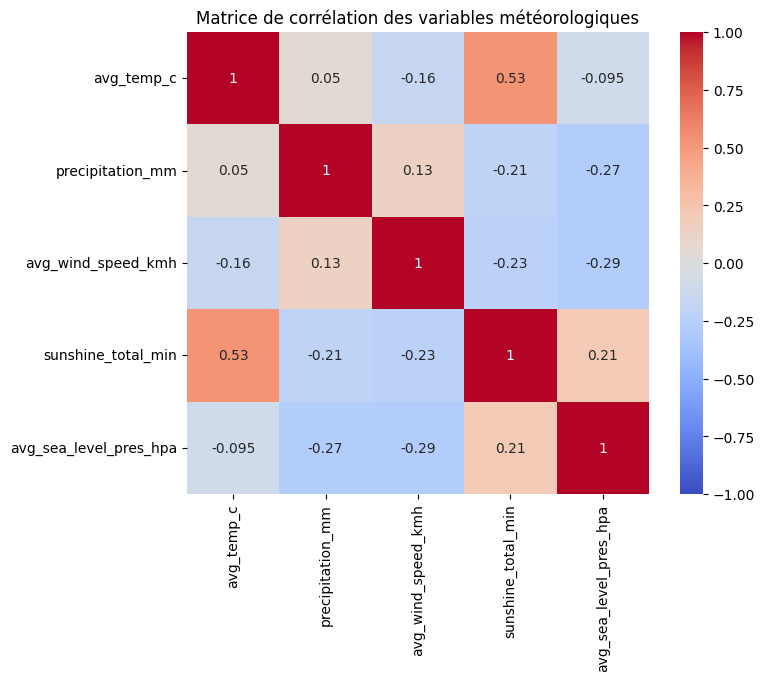

In [30]:

import seaborn as sns

# on calcule la matrice de corrélation du tableau créé auparavant
correlation_matrix = weather_complet.corr()

# on affiche la matrice de corrélation en utilisant une carte de chaleur
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Matrice de corrélation des variables météorologiques")
plt.show()


- Les valeurs proches de 1 indiquent une corrélation positive forte.
- Les valeurs proches de -1 indiquent une corrélation négative forte.
- Les valeurs proches de 0 indiquent une corrélation faible ou inexistante.\
Cette visualisation permet de voir facilement les relations entre toutes les paires de variables dans les données météorologiques.

La paire la plus corrélée est l'ensoleillement et la température moyenne (0,53), ce qui est assez logique: plus il y a de soleil, plus il fait chaud.\
Le vent et la pression atmosphérique (au niveau de la mer) sont eux corrélés de façon négative/inverse : quand le vent augmente, la pression atmosphérique diminue; ceci est cohérent pusique le vent est une phénomène causé par les différences de pression atmosphèrique entre les couches de fluides qui composent l'atmosphère. Il en est de même pour les précipitations et la pression; quand la pression baisse, les précipitations augmentent. En effet, il est connu qu'un baromètre indique s'il va pleuvoir.\
Précipitation et température moyenne ne sont pas liées (0,05); il faut alors étudier ces deux data séparément/indépendamment; on ne pourra rien conclure sur l'une en fonction de l'autre.